In [ ]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#modified code that uses updatedafter
api = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&updatedafter=2013-01-01"

response = requests.get(api)

if response.status_code == 200:
    json_data = response.json()
    earthquakes = json_data['features']

    earthquake_data = []
    for eq in earthquakes:
        properties = eq['properties']
        earthquake_data.append(properties)

    df = pd.DataFrame(earthquake_data)
    print(df)
else:
    print(f"Failed to retrieve earthquake data. Status code: {response.status_code}")


       mag                               place           time        updated  \
0     0.93                7 km WNW of Cobb, CA  1702660738530  1702660833805   
1     0.81                10 km SW of Anza, CA  1702660398120  1702660765666   
2     1.48                6 km ENE of Anza, CA  1702659505700  1702660182560   
3     2.60          18 km NE of Willow, Alaska  1702659273310  1702660906874   
4     4.70  115 km E of Aras-asan, Philippines  1702658115940  1702660438040   
...    ...                                 ...            ...            ...   
9960  1.20    23 km S of Susitna North, Alaska  1700070226330  1701462350252   
9961  0.44                9 km WNW of Cobb, CA  1700069867840  1700070491447   
9962  1.40         32 km N of Skwentna, Alaska  1700069364310  1701462345160   
9963  1.20       7 km NNW of El Moro, Colorado  1700069225641  1702459942040   
9964  1.06                          Washington  1700069205910  1700094452500   

        tz                             

In [ ]:
import sys

dataset_size_in_bytes = sys.getsizeof(df)

# Print the result
print(f"The dataset occupies approximately {dataset_size_in_bytes} bytes in memory.")

The dataset occupies approximately 11034845 bytes in memory.


In [ ]:
max_magnitude = df['mag'].max()
print(f"The maximum magnitude in the dataset is: {max_magnitude}")

The maximum magnitude in the dataset is: 7.6


In [ ]:
# Normalize the 'mag' column
# Handle NaN values for 'mag' before normalization
df['mag'].fillna(df['mag'].mean(), inplace=True)
# Min-Max normalization
mag_min = df['mag'].min()
mag_max = df['mag'].max()
df['mag_normalized'] = (df['mag'] - mag_min) / (mag_max - mag_min)
# Print the first few rows to check the normalized 'mag' values
print(df[['mag', 'mag_normalized']].head())

    mag  mag_normalized
0  0.93        0.242045
1  0.81        0.228409
2  1.48        0.304545
3  2.60        0.431818
4  4.70        0.670455


In [ ]:
# Replace NaN values with "N/A"
df.fillna("N/A", inplace=True)

In [ ]:
# New DataFrame with earthquakes of magnitudes between 1 to 3 (earthquake not felt by people but still recorded)
filtered_df_magnitude_1_3 = df[(df['mag'] >= 0) & (df['mag'] <= 3)]
filtered_df_magnitude_1_3

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,sources,types,nst,dmin,rms,gap,magType,type,title,mag_normalized
0,0.93,"7 km WNW of Cobb, CA",1702660738530,1702660833805,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",nc,",",nearby-cities,origin,phase-data,",13.0,0.01006,0.04,79.0,md,earthquake,"M 0.9 - 7 km WNW of Cobb, CA",0.242045
1,0.81,"10 km SW of Anza, CA",1702660398120,1702660765666,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",ci,",",nearby-cities,origin,phase-data,scitech-link,",34.0,0.04317,0.12,54.0,ml,earthquake,"M 0.8 - 10 km SW of Anza, CA",0.228409
2,1.48,"6 km ENE of Anza, CA",1702659505700,1702660182560,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",ci,",",focal-mechanism,nearby-cities,origin,phase-da...",65.0,0.01944,0.17,33.0,ml,earthquake,"M 1.5 - 6 km ENE of Anza, CA",0.304545
3,2.60,"18 km NE of Willow, Alaska",1702659273310,1702660906874,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,2.0,N/A,...,",ak,us,",",dyfi,origin,phase-data,",N/A,N/A,0.86,N/A,ml,earthquake,"M 2.6 - 18 km NE of Willow, Alaska",0.431818
5,1.30,"62 km NNE of Petersville, Alaska",1702658077914,1702658236653,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",ak,",",origin,phase-data,",N/A,N/A,0.97,N/A,ml,earthquake,"M 1.3 - 62 km NNE of Petersville, Alaska",0.284091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,1.20,"23 km S of Susitna North, Alaska",1700070226330,1701462350252,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",ak,",",origin,phase-data,",N/A,N/A,0.68,N/A,ml,earthquake,"M 1.2 - 23 km S of Susitna North, Alaska",0.272727
9961,0.44,"9 km WNW of Cobb, CA",1700069867840,1700070491447,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",nc,",",nearby-cities,origin,phase-data,scitech-link,",8.0,0.008214,0.03,95.0,md,earthquake,"M 0.4 - 9 km WNW of Cobb, CA",0.186364
9962,1.40,"32 km N of Skwentna, Alaska",1700069364310,1701462345160,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",ak,",",origin,phase-data,",N/A,N/A,0.32,N/A,ml,earthquake,"M 1.4 - 32 km N of Skwentna, Alaska",0.295455
9963,1.20,"7 km NNW of El Moro, Colorado",1700069225641,1702459942040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",6.0,0.166,0.11,137.0,ml,earthquake,"M 1.2 - 7 km NNW of El Moro, Colorado",0.272727


In [ ]:
# New DataFrame with earthquakes of magnitudes between 3 to 5 (earthquake can be felt and minor damages)
filtered_df_magnitude_3_5 = df[(df['mag'] >= 3) & (df['mag'] <= 5)]
filtered_df_magnitude_3_5

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,sources,types,nst,dmin,rms,gap,magType,type,title,mag_normalized
4,4.70,"115 km E of Aras-asan, Philippines",1702658115940,1702660438040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",36.0,2.441,0.6,129.0,mb,earthquake,"M 4.7 - 115 km E of Aras-asan, Philippines",0.670455
8,4.80,"117 km E of Aras-asan, Philippines",1702656332704,1702657859040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",54.0,2.487,0.78,99.0,mb,earthquake,"M 4.8 - 117 km E of Aras-asan, Philippines",0.681818
12,4.70,"119 km E of Aras-asan, Philippines",1702654826615,1702659907040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",32.0,7.977,0.83,129.0,mb,earthquake,"M 4.7 - 119 km E of Aras-asan, Philippines",0.670455
66,4.50,"173 km SSW of Puerto El Triunfo, El Salvador",1702635049415,1702637683040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",35.0,1.812,1.04,156.0,mb,earthquake,"M 4.5 - 173 km SSW of Puerto El Triunfo, El Sa...",0.647727
69,4.30,"24 km WNW of Teshio, Japan",1702634438879,1702638239040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",38.0,1.19,0.58,89.0,mb,earthquake,"M 4.3 - 24 km WNW of Teshio, Japan",0.625000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9890,3.20,"45 km S of Atka, Alaska",1700083966357,1701834354040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",ak,us,",",origin,phase-data,",12.0,0.417,0.22,266.0,ml,earthquake,"M 3.2 - 45 km S of Atka, Alaska",0.500000
9894,4.10,"62 km NNE of Calama, Chile",1700082910838,1700533270040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",20.0,0.552,0.61,57.0,mb,earthquake,"M 4.1 - 62 km NNE of Calama, Chile",0.602273
9912,3.24,"64 km NNW of San Antonio, Puerto Rico",1700078500020,1700080277440,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",pr,",",origin,phase-data,",11.0,0.6122,0.12,294.0,md,earthquake,"M 3.2 - 64 km NNW of San Antonio, Puerto Rico",0.504545
9913,3.20,"194 km WSW of Point Hope, Alaska",1700078471113,1701467792539,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",ak,",",origin,phase-data,",N/A,N/A,0.49,N/A,ml,earthquake,"M 3.2 - 194 km WSW of Point Hope, Alaska",0.500000


In [ ]:
# New DataFrame with earthquakes of magnitudes between 5 to 9 (significantly hazardous)
filtered_df_magnitude_5_9 = df[(df['mag'] >= 5) & (df['mag'] <= 9)]
filtered_df_magnitude_5_9


,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,sources,types,nst,dmin,rms,gap,magType,type,title,mag_normalized
152,5.1,Banda Sea,1702598529617,1702599277040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",36.0,2.367,0.8,80.0,mb,earthquake,M 5.1 - Banda Sea,0.715909
195,5.0,Fiji region,1702585215487,1702586293040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",48.0,3.249,0.97,66.0,mb,earthquake,M 5.0 - Fiji region,0.704545
200,5.3,"Maug Islands region, Northern Mariana Islands",1702583112017,1702585074040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",51.0,4.635,0.81,53.0,mww,earthquake,"M 5.3 - Maug Islands region, Northern Mariana ...",0.738636
216,5.4,"28 km SSW of Nueva Concepción, Guatemala",1702576501792,1702610270796,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,39.0,3.8,4.136,...,",us,usauto,",",dyfi,internal-moment-tensor,losspager,moment-...",195.0,1.569,0.86,136.0,mww,earthquake,"M 5.4 - 28 km SSW of Nueva Concepción, Guatemala",0.750000
222,5.2,South Sandwich Islands region,1702573059212,1702659792909,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,3.249,...,",us,",",losspager,origin,phase-data,shakemap,",152.0,7.685,0.7,31.0,mww,earthquake,M 5.2 - South Sandwich Islands region,0.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9526,5.7,"76 km SW of Kēng Tung, Myanmar",1700185031214,1702161243309,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,69.0,7.4,7.304,...,",us,usauto,pt,",",dyfi,impact-text,internal-moment-tensor,inter...",117.0,0.252,0.82,45.0,mww,earthquake,"M 5.7 - 76 km SW of Kēng Tung, Myanmar",0.784091
9781,5.0,"297 km SW of Longyearbyen, Svalbard and Jan Mayen",1700126478795,1702546397040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",moment-tensor,origin,phase-data,",93.0,2.768,0.69,34.0,mww,earthquake,"M 5.0 - 297 km SW of Longyearbyen, Svalbard an...",0.704545
9853,5.1,N/A,1700101308025,1701576051040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",90.0,2.387,0.8,71.0,mb,earthquake,M 5.1 -,0.715909
9875,5.0,south of the Fiji Islands,1700092540407,1702273947040,N/A,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,N/A,N/A,N/A,...,",us,",",origin,phase-data,",123.0,4.614,0.55,80.0,mb,earthquake,M 5.0 - south of the Fiji Islands,0.704545


csv file created
       mag                               place           time        updated  \
0     0.93                7 km WNW of Cobb, CA  1702660738530  1702660833805   
1     0.81                10 km SW of Anza, CA  1702660398120  1702660765666   
2     1.48                6 km ENE of Anza, CA  1702659505700  1702660182560   
3     2.60          18 km NE of Willow, Alaska  1702659273310  1702660906874   
4     4.70  115 km E of Aras-asan, Philippines  1702658115940  1702660438040   
...    ...                                 ...            ...            ...   
9960  1.20    23 km S of Susitna North, Alaska  1700070226330  1701462350252   
9961  0.44                9 km WNW of Cobb, CA  1700069867840  1700070491447   
9962  1.40         32 km N of Skwentna, Alaska  1700069364310  1701462345160   
9963  1.20       7 km NNW of El Moro, Colorado  1700069225641  1702459942040   
9964  1.06                          Washington  1700069205910  1700094452500   

      tz              

<ipython-input-14-1c371c6fc21b>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/l

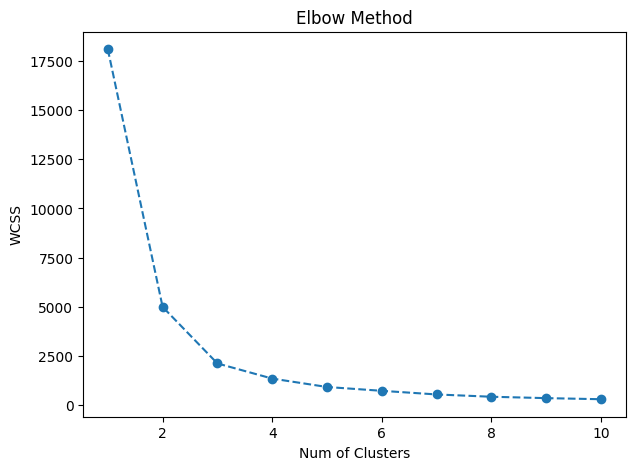

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-1c371c6fc21b>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = clusterlabels


              mag
cluster          
0        4.503147
1        1.864547
2        0.667477
Num earthquakes in Cluster 0: 1503
Num earthquakes in Cluster 1: 4561
Num earthquakes in Cluster 2: 3900


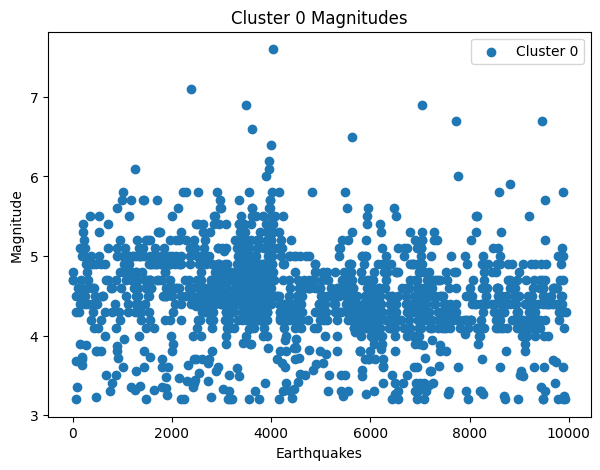

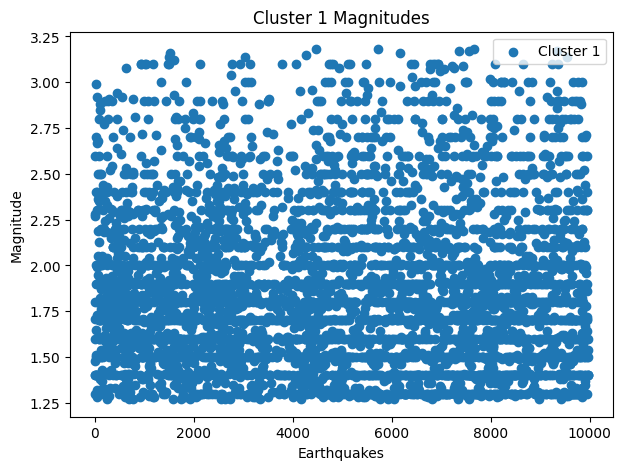

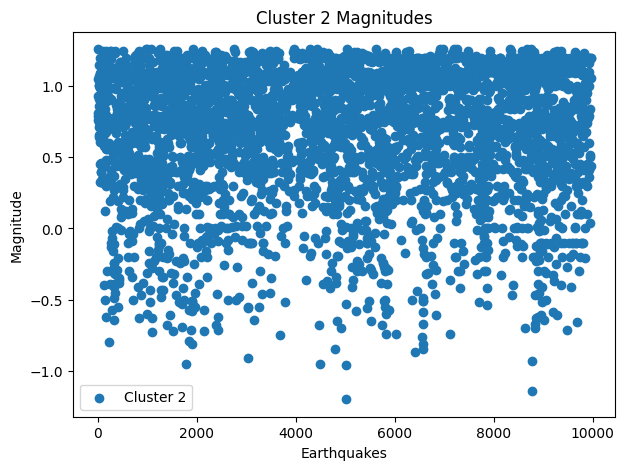

In [ ]:
import requests
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#changing the api data into a csv file

api = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&updatedafter=2013-01-01"

response = requests.get(api)

if response.status_code == 200:
    json_data = response.json()
    earthquakes = json_data['features']

    earthquake_data = []
    for eq in earthquakes:
        properties = eq['properties']
        earthquake_data.append(properties)
    df = pd.DataFrame(earthquake_data)

    df.to_csv('earthquake_data.csv', index=False)
    print("csv file created")
else:
    print("no csv file created")


df = pd.read_csv("earthquake_data.csv")
print(df)

numerical_columns = ['mag']
data = df[numerical_columns]

data.dropna(inplace=True)

#using elbow method to find the optimal k-value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

#plot for elbow method
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.show()


#clustering using k= 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusterlabels = kmeans.fit_predict(data)

data['cluster'] = clusterlabels
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)

#finding counts of earthquake occurences for each cluster
cluster0_count = sum(clusterlabels == 0)
cluster1_count = sum(clusterlabels == 1)
cluster2_count = sum(clusterlabels == 2)



print(f"Num earthquakes in Cluster 0: {cluster0_count}")
print(f"Num earthquakes in Cluster 1: {cluster1_count}")
print(f"Num earthquakes in Cluster 2: {cluster2_count}")

# cluster plot
for i in range(3):
    cluster_data = data[data['cluster'] == i]
    plt.figure(figsize=(7, 5))
    plt.scatter(cluster_data.index, cluster_data['mag'], label=f'Cluster {i}')
    plt.title(f'Cluster {i} Magnitudes')
    plt.xlabel('Earthquakes')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()


CSV file created
       mag   latitude   longitude
0     1.56  38.845001 -122.814003
1     1.35  35.705500 -117.560333
2     1.60  31.556000 -104.184000
3     1.80  61.302100 -146.877000
4     2.42  19.451333 -155.591000
...    ...        ...         ...
9994  0.74  34.110000 -117.309500
9995  2.30  40.779300 -119.561300
9996  1.72  42.437333 -122.778833
9997  1.04  38.831001 -122.818169
9998  0.45  38.823500 -122.802167

[9999 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

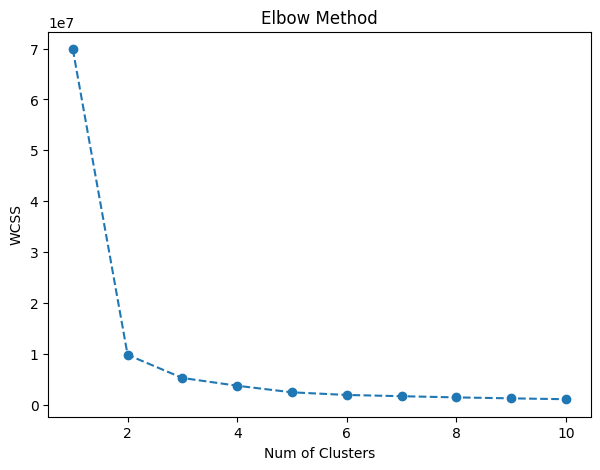

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


              mag   latitude   longitude
cluster                                 
0        1.380686  34.759562 -111.436164
1        4.596036  10.817826  127.667524
2        1.628662  49.328510 -154.855241
Num earthquakes in Cluster 0: 5338
Num earthquakes in Cluster 1: 999
Num earthquakes in Cluster 2: 3662
Locations with Highest Magnitudes:
      mag  latitude  longitude
2346  5.8   18.3866   -98.5503
4108  7.6    8.5266   126.4487
1324  6.1  -18.6761  -175.4826


In [ ]:
import requests
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Changing the API data into a CSV file
api = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&updatedafter=2013-01-01"
response = requests.get(api)

if response.status_code == 200:
    json_data = response.json()
    earthquakes = json_data['features']

    earthquake_data = []
    for eq in earthquakes:
        properties = eq['properties']
        geometry = eq['geometry']['coordinates']
        earthquake_data.append({'mag': properties['mag'], 'latitude': geometry[1], 'longitude': geometry[0]})

    df = pd.DataFrame(earthquake_data)

    df.to_csv('earthquake_data.csv', index=False)
    print("CSV file created")
else:
    print("No CSV file created")

df = pd.read_csv("earthquake_data.csv")
print(df)

# Selecting numerical columns for clustering
numerical_columns = ['mag', 'latitude', 'longitude']
data = df[numerical_columns]

data.dropna(inplace=True)

# Using elbow method to find the optimal k-value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot for elbow method
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Num of Clusters')
plt.ylabel('WCSS')
plt.show()

# Clustering using k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data)

data['cluster'] = cluster_labels
cluster_summary = data.groupby('cluster').mean()
print(cluster_summary)

# Finding counts of earthquake occurrences for each cluster
for i in range(3):
    cluster_count = sum(cluster_labels == i)
    print(f"Num earthquakes in Cluster {i}: {cluster_count}")

# Finding locations with the highest magnitudes in each cluster
locations_highest_magnitude = data.loc[data.groupby('cluster')['mag'].idxmax()]

# Print the locations with the highest magnitudes
print("Locations with Highest Magnitudes:")
print(locations_highest_magnitude[['mag', 'latitude', 'longitude']])


In [ ]:
#Time finder for earthquakes

import requests
import pandas as pd
from datetime import datetime

# API URL with 'updatedafter' parameter
api = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&updatedafter=2013-01-01"

# Fetch earthquake data
response = requests.get(api)

if response.status_code == 200:
    # Extract earthquake properties from JSON data
    json_data = response.json()
    earthquakes = json_data['features']

    earthquake_data = []
    for eq in earthquakes:
        properties = eq['properties']
        # Convert time from UNIX timestamp to human-readable format
        properties['time'] = datetime.utcfromtimestamp(properties['time'] / 1000).strftime('%Y-%m-%d %H:%M:%S')
        earthquake_data.append(properties)

    # Create DataFrame
    df = pd.DataFrame(earthquake_data)

    # Print DataFrame
    print(df)

    # Find the times for the earthquakes
    earthquake_times = df['time']
    print("\nTimes of Earthquakes (in human-readable format):")
    print(earthquake_times)

else:
    print(f"Failed to retrieve earthquake data. Status code: {response.status_code}")


        mag                                 place                 time  \
0      0.78                  8 km WNW of Cobb, CA  2023-12-16 20:04:14   
1      1.62             1 km W of The Geysers, CA  2023-12-16 19:30:58   
2      4.70      39 km E of Port Alsworth, Alaska  2023-12-16 19:24:39   
3      0.58            10 km NE of San Martin, CA  2023-12-16 19:24:18   
4      1.60             48 km W of Mentone, Texas  2023-12-16 19:21:29   
...     ...                                   ...                  ...   
10023  1.90  56 km SSW of Whites City, New Mexico  2023-11-16 21:09:15   
10024  4.40           98 km E of Hengchun, Taiwan  2023-11-16 21:00:27   
10025  1.46               4 km ESE of Oakland, CA  2023-11-16 20:53:32   
10026  1.60               Kenai Peninsula, Alaska  2023-11-16 20:39:10   
10027  1.46           13 km ENE of Ridgecrest, CA  2023-11-16 20:33:10   

             updated    tz                                                url  \
0      1702757711214  None  ht

In [ ]:
import requests
import pandas as pd

# API URL with 'updatedafter' parameter
api = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&updatedafter=2013-01-01"

# Fetch earthquake data
response = requests.get(api)

if response.status_code == 200:
    # Extract earthquake properties from JSON data
    json_data = response.json()
    earthquakes = json_data['features']

    earthquake_data = []
    for eq in earthquakes:
        properties = eq['properties']
        earthquake_data.append(properties)

    # Create DataFrame
    df = pd.DataFrame(earthquake_data)

    # Print DataFrame
    print(df)

    # Find the top 3 locations with the highest magnitudes
    top_locations = df.nlargest(10, 'mag')[['mag', 'place']]
    print("\nTop 10 Locations with Highest Magnitudes:")
    print(top_locations[['mag', 'place']])

else:
    print(f"Failed to retrieve earthquake data. Status code: {response.status_code}")


        mag                                 place           time  \
0      1.91            13 km NE of Pāhala, Hawaii  1702758613090   
1      0.78                  8 km WNW of Cobb, CA  1702757054330   
2      1.62             1 km W of The Geysers, CA  1702755058720   
3      4.70      39 km E of Port Alsworth, Alaska  1702754679717   
4      0.58            10 km NE of San Martin, CA  1702754658300   
...     ...                                   ...            ...   
10025  0.53     16 km SE of Carbonado, Washington  1700169166870   
10026  1.90  56 km SSW of Whites City, New Mexico  1700168955246   
10027  4.40           98 km E of Hengchun, Taiwan  1700168427075   
10028  1.46               4 km ESE of Oakland, CA  1700168012560   
10029  1.60               Kenai Peninsula, Alaska  1700167150990   

             updated    tz                                                url  \
0      1702758803850  None  https://earthquake.usgs.gov/earthquakes/eventp...   
1      1702758072256 

In [ ]:
# Exploring the time, place and magnitude of the top ten earthquakes (by mag)

import requests
import pandas as pd
from datetime import datetime

# API URL with 'updatedafter' parameter
api = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&updatedafter=2013-01-01"

# Fetch earthquake data
response = requests.get(api)

if response.status_code == 200:
    # Extract earthquake properties from JSON data
    json_data = response.json()
    earthquakes = json_data['features']

    earthquake_data = []
    for eq in earthquakes:
        properties = eq['properties']
        # Convert time from UNIX timestamp to human-readable format
        properties['time'] = datetime.utcfromtimestamp(properties['time'] / 1000).strftime('%Y-%m-%d %H:%M:%S')
        earthquake_data.append(properties)

    # Create DataFrame
    df = pd.DataFrame(earthquake_data)

    # Print DataFrame
    print(df)

    # Find the top 10 earthquakes with the highest magnitudes and their times
    top_earthquakes = df.nlargest(10, 'mag')[['mag', 'time', 'place']]
    print("\nTop 10 Earthquakes with Highest Magnitudes:")
    print(top_earthquakes)

else:
    print(f"Failed to retrieve earthquake data. Status code: {response.status_code}")


        mag                                 place                 time  \
0      1.91            13 km NE of Pāhala, Hawaii  2023-12-16 20:30:13   
1      0.78                  8 km WNW of Cobb, CA  2023-12-16 20:04:14   
2      1.62             1 km W of The Geysers, CA  2023-12-16 19:30:58   
3      4.70      39 km E of Port Alsworth, Alaska  2023-12-16 19:24:39   
4      0.58            10 km NE of San Martin, CA  2023-12-16 19:24:18   
...     ...                                   ...                  ...   
10025  0.53     16 km SE of Carbonado, Washington  2023-11-16 21:12:46   
10026  1.90  56 km SSW of Whites City, New Mexico  2023-11-16 21:09:15   
10027  4.40           98 km E of Hengchun, Taiwan  2023-11-16 21:00:27   
10028  1.46               4 km ESE of Oakland, CA  2023-11-16 20:53:32   
10029  1.60               Kenai Peninsula, Alaska  2023-11-16 20:39:10   

             updated    tz                                                url  \
0      1702758803850  None  ht